In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [ ]:
file_path="Student Depression Dataset.csv"
df=pd.read_csv(file_path)


In [ ]:
print("Shape of Data:", df.shape)
print("\nColumns:\n", df.columns)
print("\nData Types:\n", df.dtypes)
print("\nFirst 5 Rows:\n", df.head())

Shape of Data: (27901, 18)

Columns:
 Index(['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

Data Types:
 id                                         int64
Gender                                    object
Age                                      float64
City                                      object
Profession                                object
Academic Pressure                        float64
Work Pressure                            float64
CGPA                                     float64
Study Satisfaction                       float64
Job Satisfaction                         float64
Sleep Duration                            object
Dietary Habits                           

In [ ]:
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         3
Family History of Mental Illness         0
Depression                               0
dtype: int64


In [ ]:
print("\nDescriptive Statistics:\n", df.describe())



Descriptive Statistics:
                   id           Age  Academic Pressure  Work Pressure  \
count   27901.000000  27901.000000       27901.000000   27901.000000   
mean    70442.149421     25.822300           3.141214       0.000430   
std     40641.175216      4.905687           1.381465       0.043992   
min         2.000000     18.000000           0.000000       0.000000   
25%     35039.000000     21.000000           2.000000       0.000000   
50%     70684.000000     25.000000           3.000000       0.000000   
75%    105818.000000     30.000000           4.000000       0.000000   
max    140699.000000     59.000000           5.000000       5.000000   

               CGPA  Study Satisfaction  Job Satisfaction  Work/Study Hours  \
count  27901.000000        27901.000000      27901.000000      27901.000000   
mean       7.656104            2.943837          0.000681          7.156984   
std        1.470707            1.361148          0.044394          3.707642   
min      

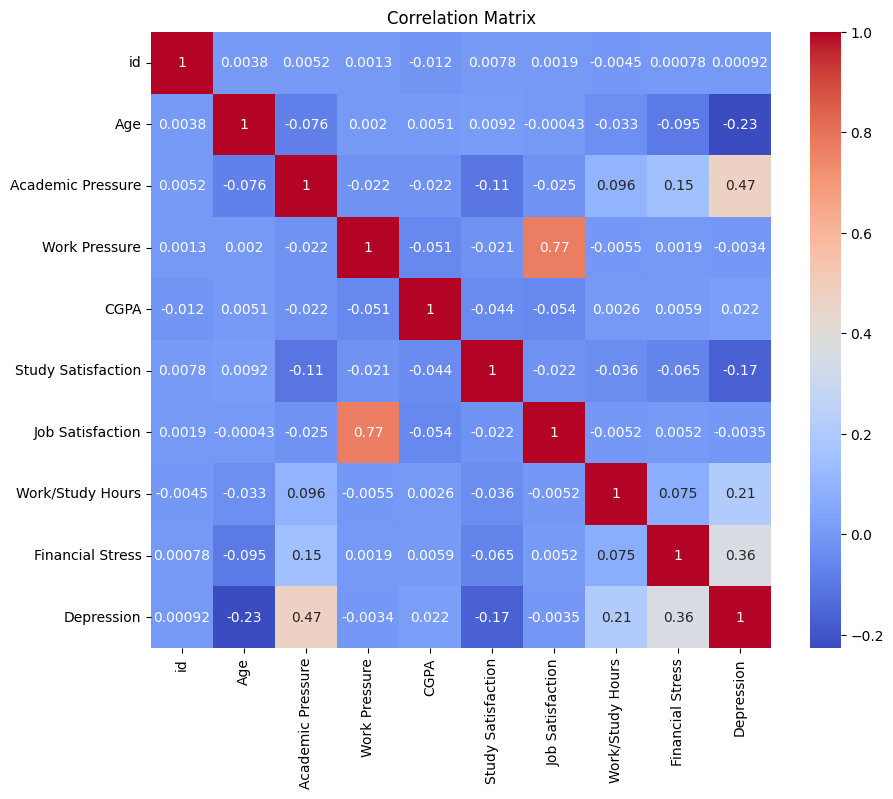

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [ ]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')


In [ ]:
df = df.drop_duplicates()


In [ ]:
threshold = len(df) * 0.5
df = df.dropna(thresh=threshold, axis=1)


In [ ]:
categorical_cols = df.select_dtypes(include='object').columns.tolist()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [ ]:
print("✅ Preprocessing completed!")
print("Shape:", df.shape)
print("Columns:", df.columns)
df.head()

✅ Preprocessing completed!
Shape: (27901, 18)
Columns: Index(['id', 'gender', 'age', 'city', 'profession', 'academic_pressure',
       'work_pressure', 'cgpa', 'study_satisfaction', 'job_satisfaction',
       'sleep_duration', 'dietary_habits', 'degree',
       'have_you_ever_had_suicidal_thoughts_?', 'work/study_hours',
       'financial_stress', 'family_history_of_mental_illness', 'depression'],
      dtype='object')


,id,gender,age,city,profession,academic_pressure,work_pressure,cgpa,study_satisfaction,job_satisfaction,sleep_duration,dietary_habits,degree,have_you_ever_had_suicidal_thoughts_?,work/study_hours,financial_stress,family_history_of_mental_illness,depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [ ]:
print("Original shape:", df.shape)
print("Columns:", df.columns)

Original shape: (27901, 18)
Columns: Index(['id', 'gender', 'age', 'city', 'profession', 'academic_pressure',
       'work_pressure', 'cgpa', 'study_satisfaction', 'job_satisfaction',
       'sleep_duration', 'dietary_habits', 'degree',
       'have_you_ever_had_suicidal_thoughts_?', 'work/study_hours',
       'financial_stress', 'family_history_of_mental_illness', 'depression'],
      dtype='object')


In [ ]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

In [ ]:
df = df.drop_duplicates()
print("Shape after removing duplicates:", df.shape)


Shape after removing duplicates: (27901, 18)


In [ ]:
threshold = len(df) * 0.5
df = df.dropna(thresh=threshold, axis=1)

In [ ]:
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        df[col] = df[col].fillna(df[col].median())
    else:
        df[col] = df[col].fillna(df[col].mode()[0])


In [ ]:
print("Final cleaned shape:", df.shape)
print("Missing values after cleaning:\n", df.isnull().sum())
df.head()

Final cleaned shape: (27901, 18)
Missing values after cleaning:
 id                                       0
gender                                   0
age                                      0
city                                     0
profession                               0
academic_pressure                        0
work_pressure                            0
cgpa                                     0
study_satisfaction                       0
job_satisfaction                         0
sleep_duration                           0
dietary_habits                           0
degree                                   0
have_you_ever_had_suicidal_thoughts_?    0
work/study_hours                         0
financial_stress                         0
family_history_of_mental_illness         0
depression                               0
dtype: int64


,id,gender,age,city,profession,academic_pressure,work_pressure,cgpa,study_satisfaction,job_satisfaction,sleep_duration,dietary_habits,degree,have_you_ever_had_suicidal_thoughts_?,work/study_hours,financial_stress,family_history_of_mental_illness,depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


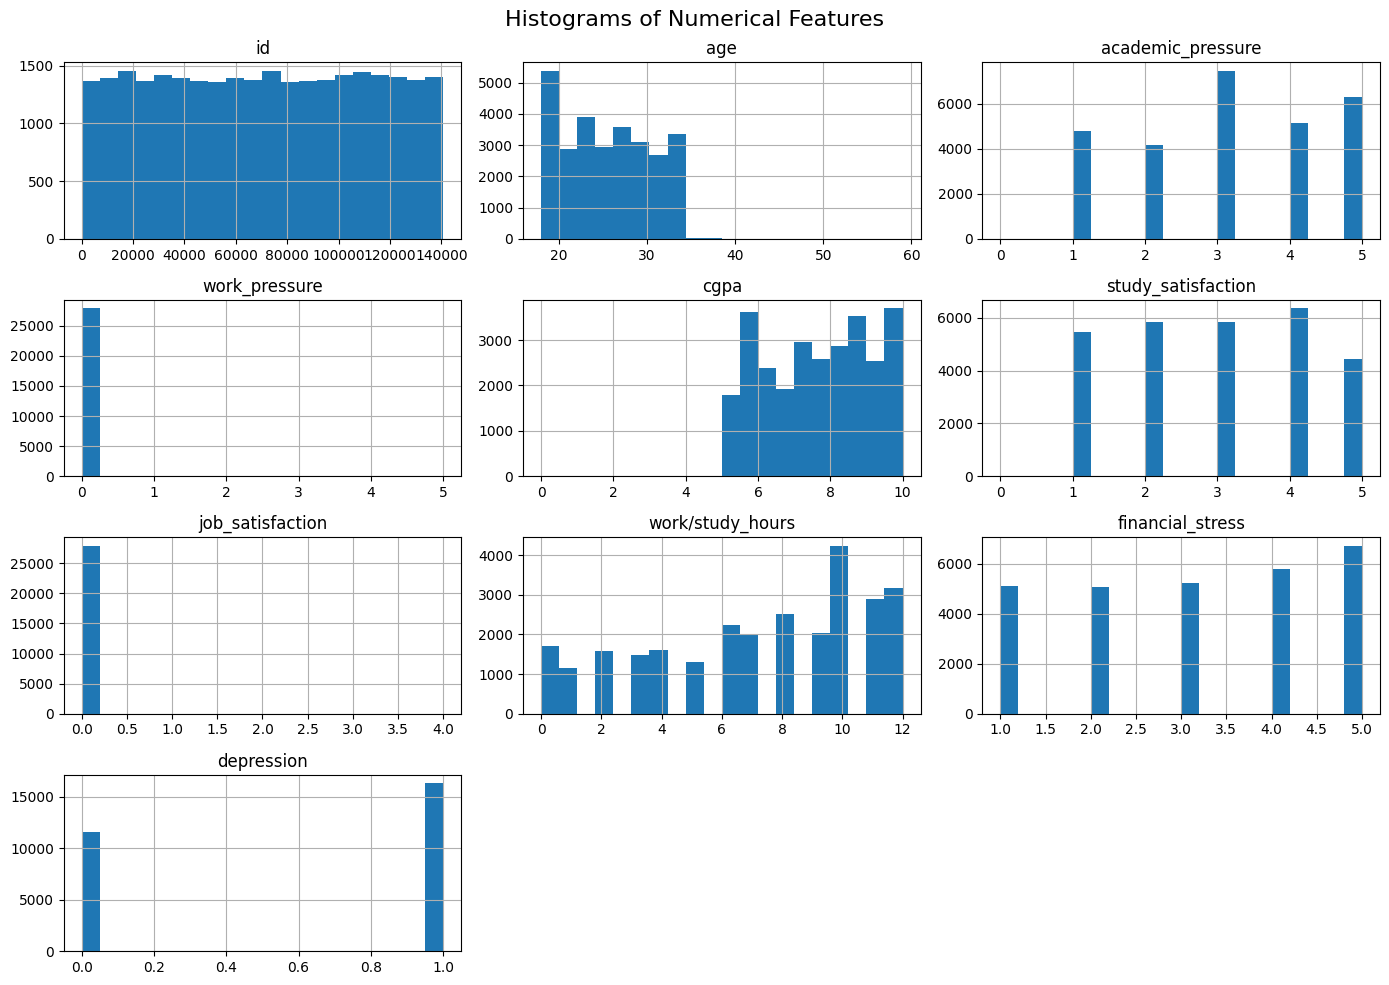

In [ ]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_cols].hist(figsize=(14, 10), bins=20)
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.tight_layout()
plt.show()


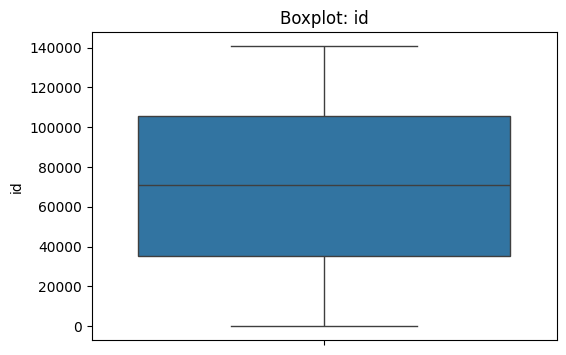

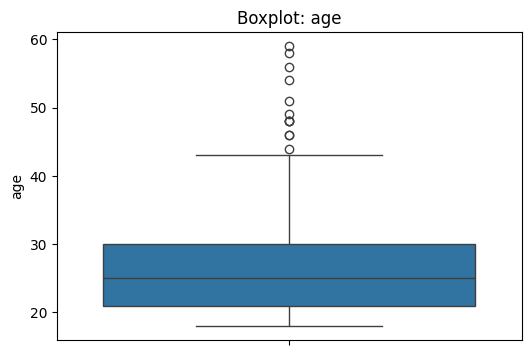

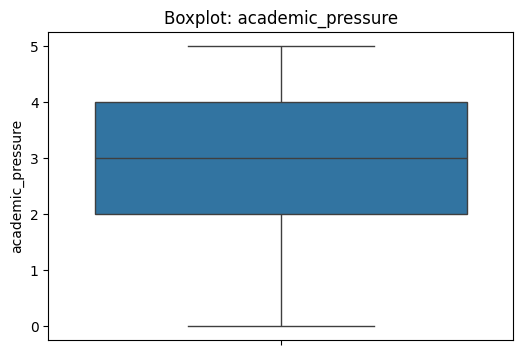

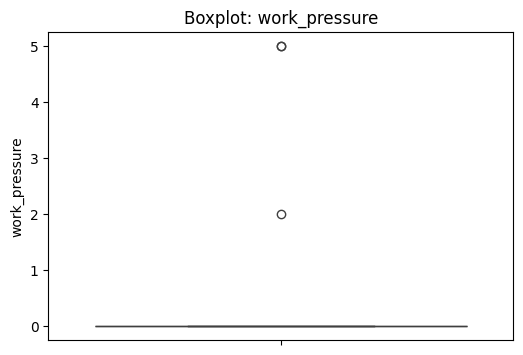

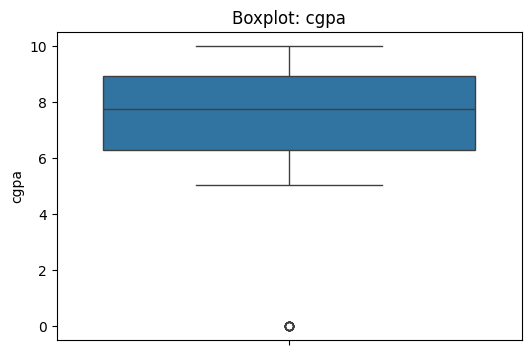

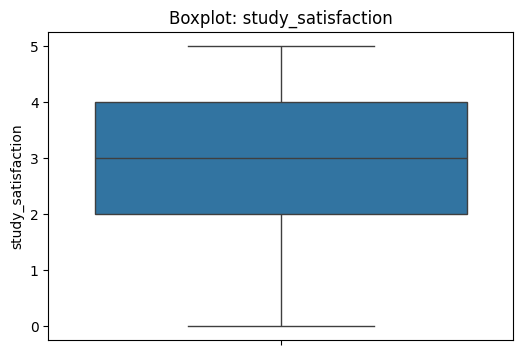

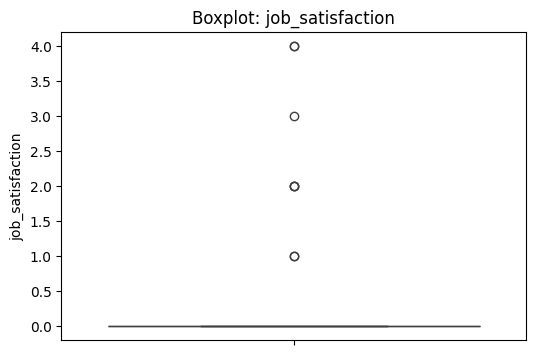

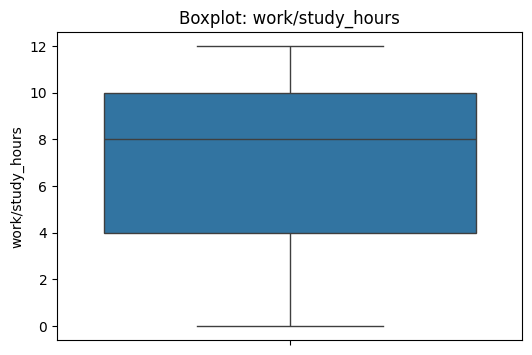

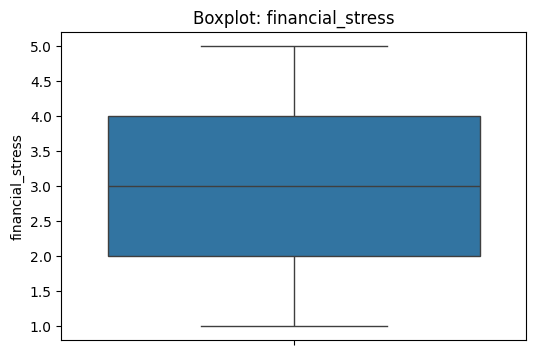

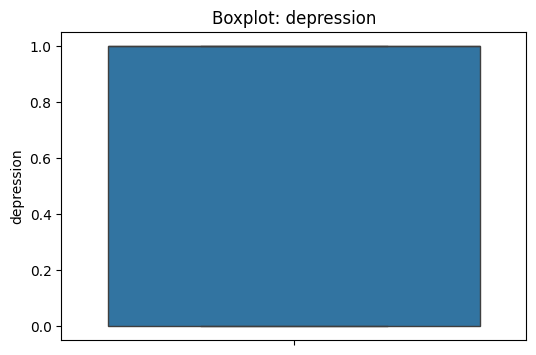

In [ ]:
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot: {col}")
    plt.show()

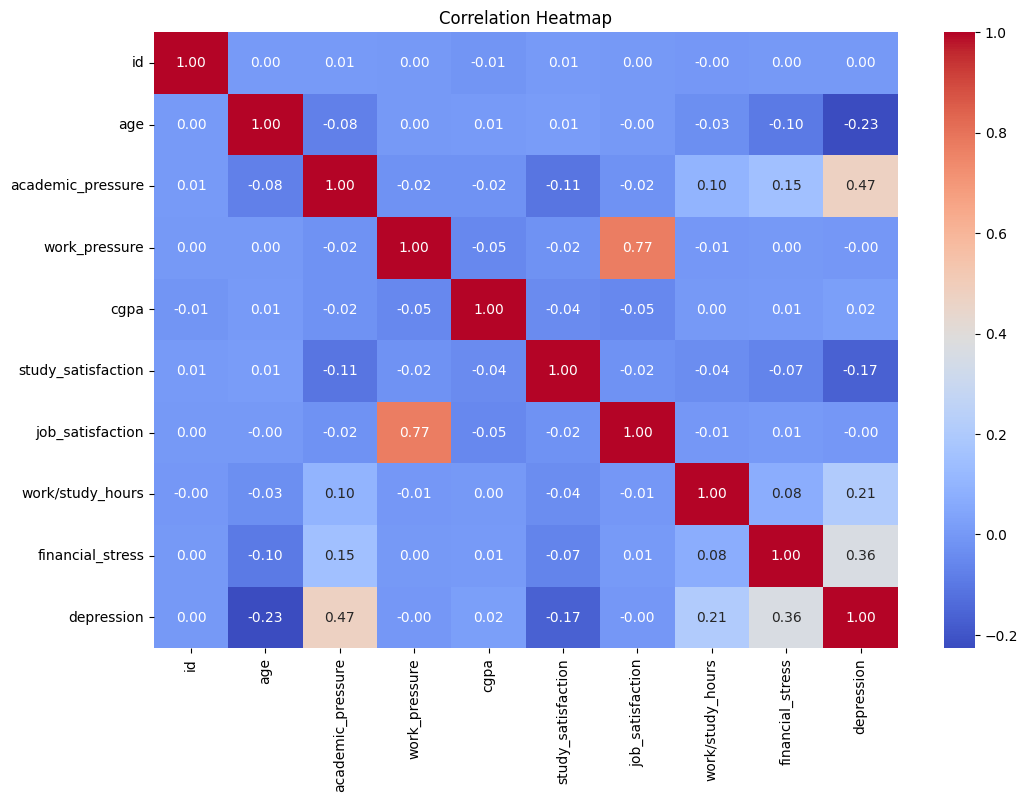

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()


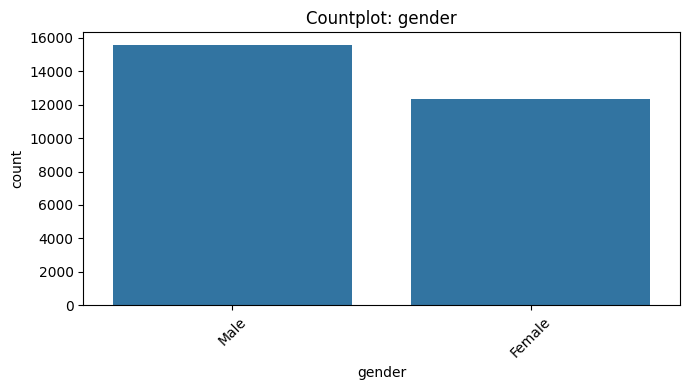

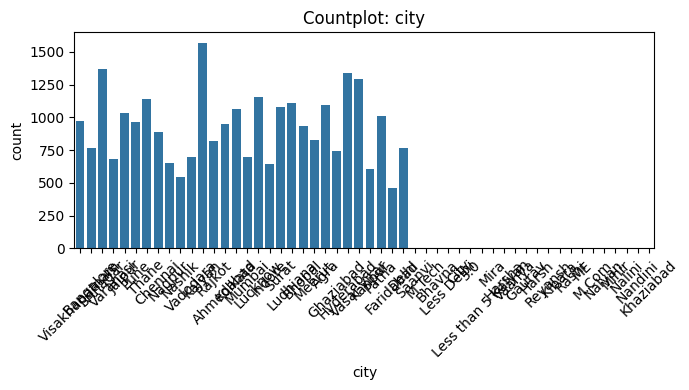

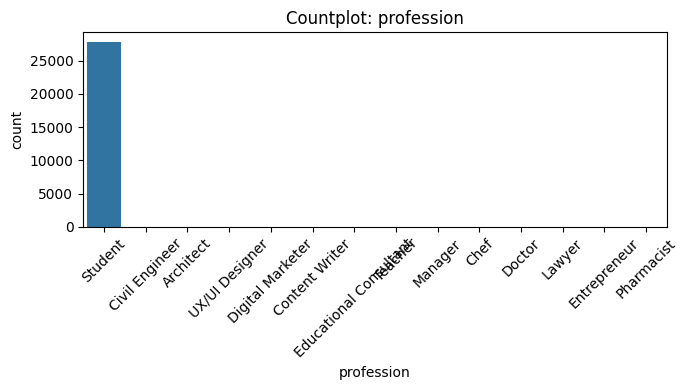

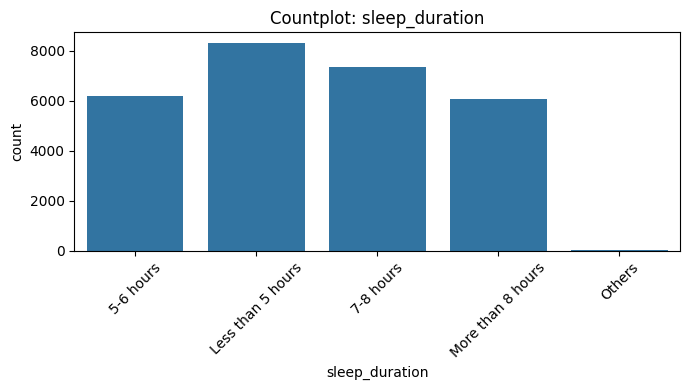

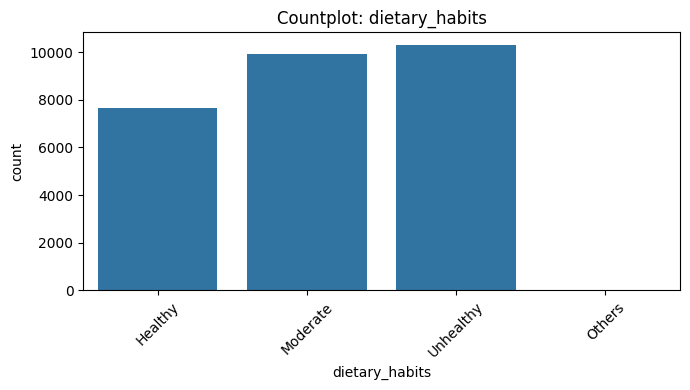

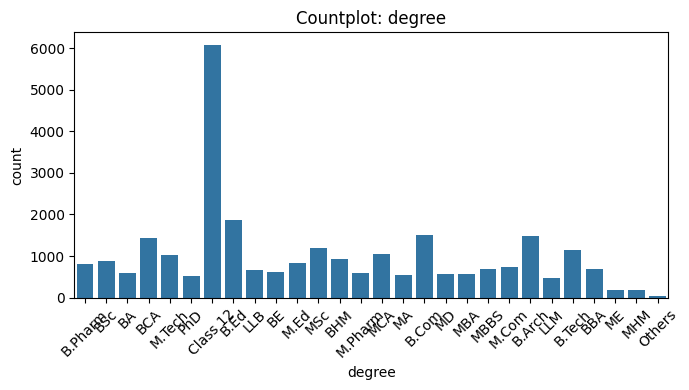

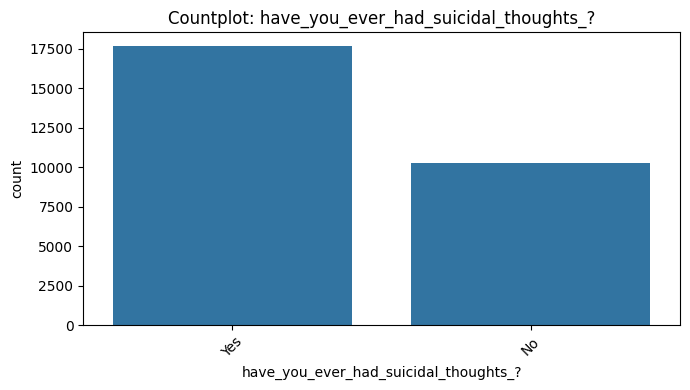

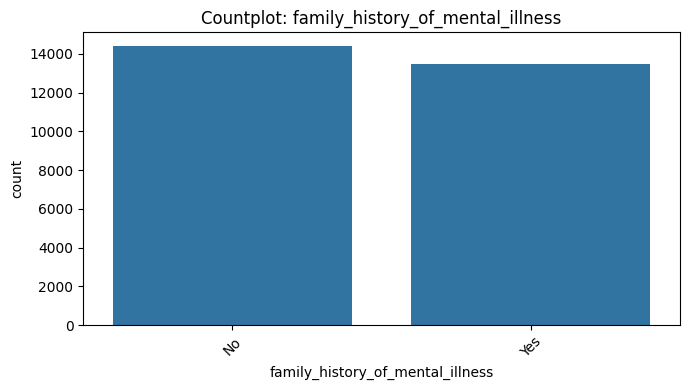

In [ ]:
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    plt.figure(figsize=(7, 4))
    sns.countplot(data=df, x=col)
    plt.title(f"Countplot: {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [ ]:
if len(numerical_cols) <= 6:
    sns.pairplot(df[numerical_cols])
    plt.suptitle("Pairplot of Numerical Features", y=1.02)
    plt.show()

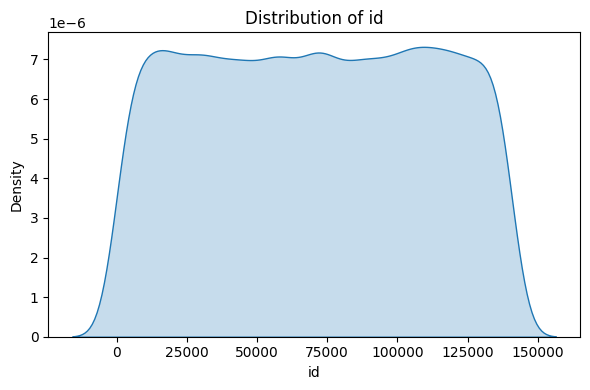

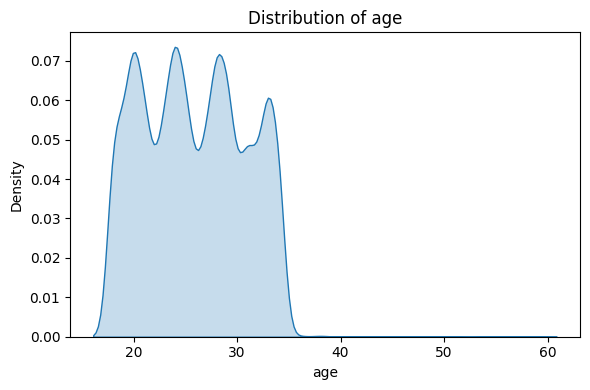

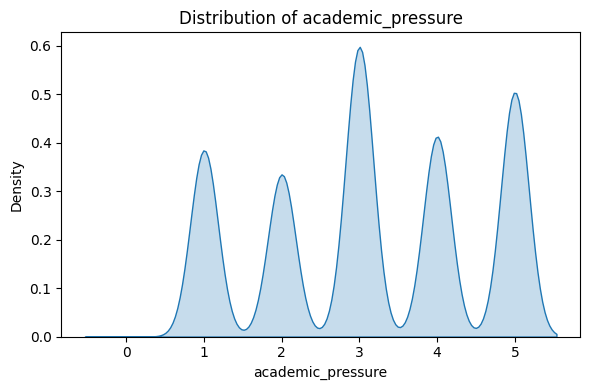

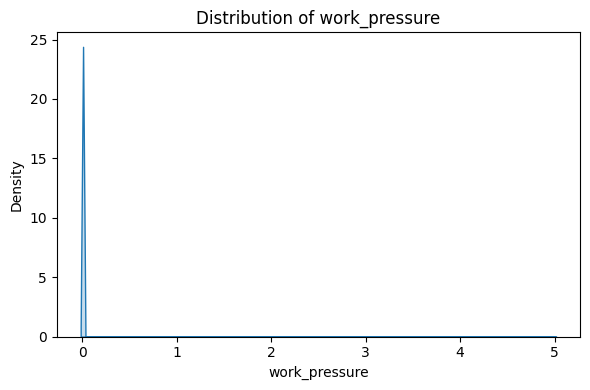

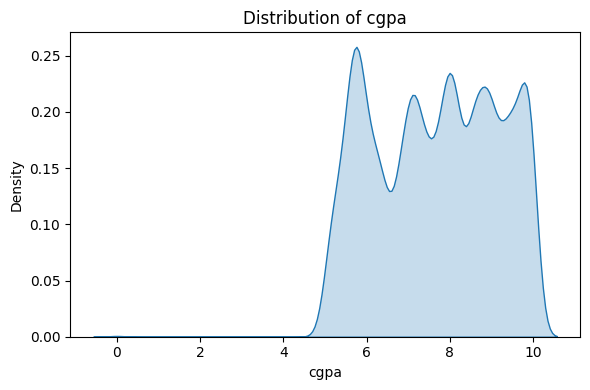

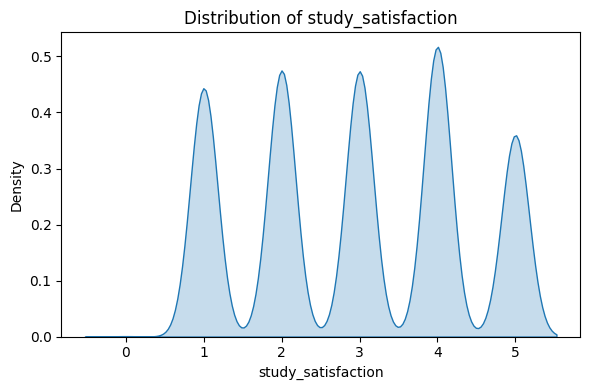

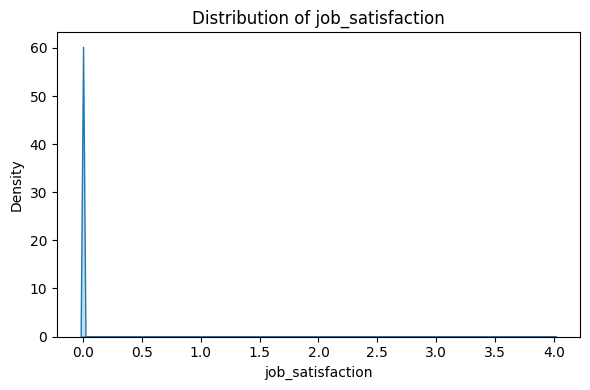

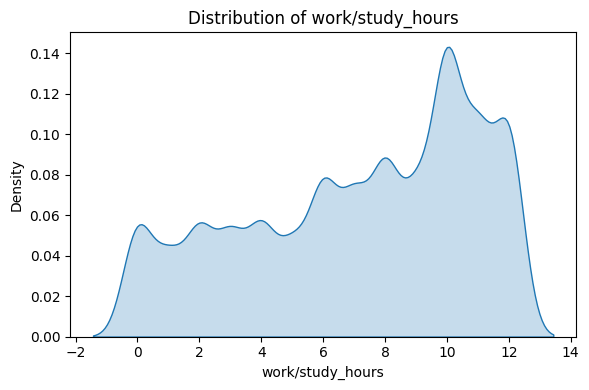

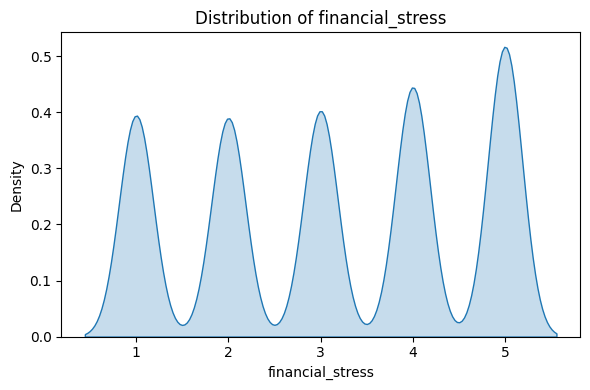

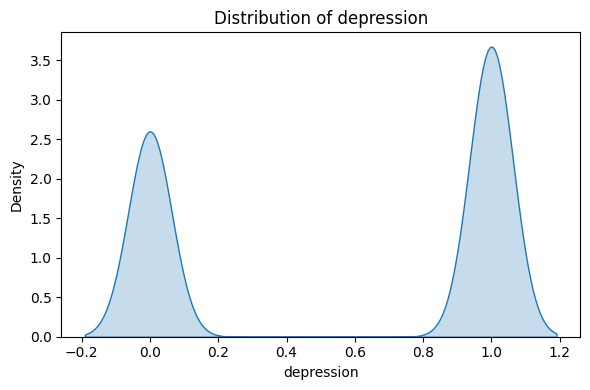

In [ ]:
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.kdeplot(df[col], shade=True)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()